In [ ]:
import sys
import pandas
import numpy
import sklearn
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print('number of sample : ', data.target.sum())
print('number of feature : ', len(data.feature_names))

number of sample :  357
number of feature :  30


In [ ]:
label = data.target
data = data.data   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(data, label, train_size=0.6, random_state=42)
X_val, X_test, y_val, y_test   = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(341, 30) (341,) (114, 30) (114,) (114, 30) (114,)


In [ ]:
from sklearn.preprocessing import StandardScaler
data_standard = StandardScaler().fit(data)
X_train_std = data_standard.transform(X_train)
X_val_std = data_standard.transform(X_val)
X_test_std = data_standard.transform(X_test)

In [ ]:
data = data_standard.transform(data)

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 30, kernel_initializer= 'normal', activation= 'relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer= 'normal', activation= 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model
model = create_model()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model = KerasClassifier(build_fn = create_model, verbose = 1)
history = model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), batch_size=30, epochs=50)

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-8-09c49e3ff377>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 1)


12/12 [==============================] - 2s 22ms/step - loss: 0.5762 - accuracy: 0.8886 - val_loss: 0.3246 - val_accuracy: 0.9561
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.9560 - val_loss: 0.0888 - val_accuracy: 0.9561
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1097 - accuracy: 0.9648 - val_loss: 0.0562 - val_accuracy: 0.9825
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9795 - val_loss: 0.0486 - val_accuracy: 0.9912
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0713 - accuracy: 0.9795 - val_loss: 0.0517 - val_accuracy: 0.9825
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0649 - accuracy: 0.9824 - val_loss: 0.0483 - val_accuracy: 0.9825
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0623 - accuracy: 0.9795 - val_loss: 0.0456 - val_accuracy: 0.9912
Epoch 8/50
12/12 [============



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


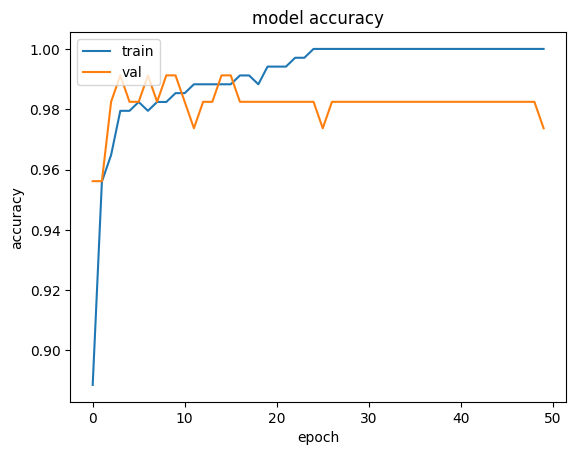

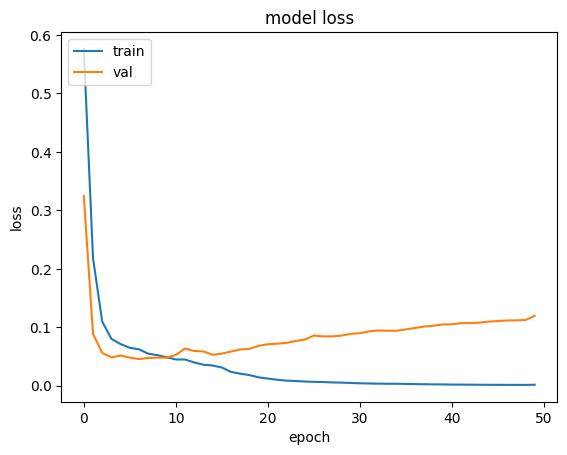

In [ ]:
# plot learning curves

print("\n")
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 모델 정의 
def create_model(neuron1, neuron2):
    # 케라스 모델 생성
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 30, 
                    kernel_initializer= 'uniform', 
                    activation= 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2, input_dim = neuron1, 
                    kernel_initializer= 'uniform', 
                    activation= 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = adam, 
                  metrics = ['accuracy'])
    return model

# 모델 생성
model = KerasClassifier(build_fn = create_model, 
                        epochs = 100, batch_size = 20, verbose = 0)

# 그리드 탐색 매개변수 설정 
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# 그리드 탐색 매개변수를 딕셔너리로 변화 
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# GridSearchCV 빌드와 적합
grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid, 
                    cv = KFold(random_state=42, shuffle=True), 
                    refit = True, 
                    verbose = 10)
grid_results = grid.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), batch_size=30, epochs=50)

# 결과 보고
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

<ipython-input-10-35bacb75c9ac>:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.942 total time=   3.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.941 total time=   3.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   3.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.956 total time=   3.9s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.971 total time=   3.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

18/18 [==============================] - 0s 1ms/step


(569, 1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
pred = grid.predict(data)
print('전체 데이터')
print(accuracy_score(label, pred))
print(classification_report(label, pred))

18/18 [==============================] - 0s 1ms/step
전체 데이터
0.9789103690685413
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       212
           1       0.99      0.98      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
pred = grid.predict(X_test)
print('테스트 데이터')
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

4/4 [==============================] - 0s 2ms/step
테스트 데이터
0.3333333333333333
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        38
           1       0.00      0.00      0.00        76

    accuracy                           0.33       114
   macro avg       0.17      0.50      0.25       114
weighted avg       0.11      0.33      0.17       114



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
